In [49]:
# Importing Libraries
import ast
import pandas as pd 
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the Dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Data Cleanup
def clean_list(skill_list):
    if pd.notna(skill_list):
        return ast.literal_eval(skill_list)
    else:
        return
    
df['job_skills'] = df['job_skills'].apply(clean_list)

In [81]:
df_DA_IND = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()
df_DA_IND = df_DA_IND.dropna(subset='salary_year_avg')

In [82]:
df_DA_skills = df_DA_IND.explode('job_skills')
df_DA_skills = df_DA_skills.groupby(by='job_skills').agg(
    skill_count = ('job_skills','count'),
    median_salary = ('salary_year_avg','median')).sort_values('median_salary',ascending=False)
df_DA_skills = df_DA_skills.sort_values(by='skill_count',ascending=False)


In [90]:
#Adding a new column to compute percentages
no_of_jobs = len(df_DA_IND)
df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / no_of_jobs * 100
skill_percent_limit = 10
df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] >= skill_percent_limit].copy()
df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,46,96050.00,48.936170
excel,39,98500.00,41.489362
python,36,96050.00,38.297872
tableau,20,108087.50,21.276596
r,18,79200.00,19.148936
power bi,17,111175.00,18.085106
azure,15,93600.00,15.957447
aws,12,79200.00,12.765957
oracle,11,79200.00,11.702128


In [ ]:
pip install adjustText

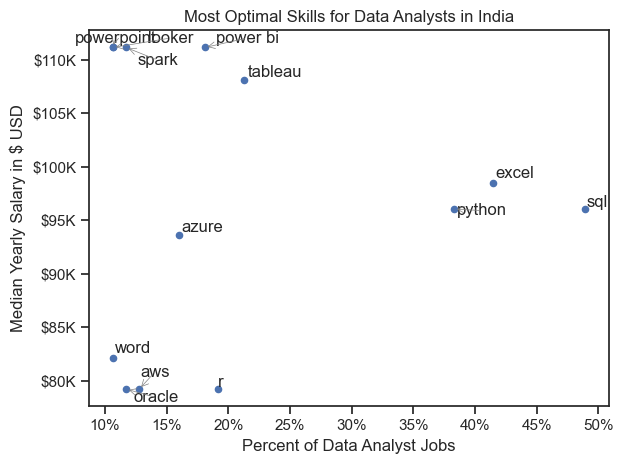

In [91]:
# Plotting the data
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter
df_DA_skills_high_demand.plot(kind='scatter',x='skill_percent',y= 'median_salary')

texts = []
for i,txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i],df_DA_skills_high_demand['median_salary'].iloc[i],txt))

adjust_text(
    texts,
    arrowprops=dict(arrowstyle='->', color='gray', lw=0.5),
    expand_text=(1.2, 1.2),
    expand_points=(1.2, 1.2),
    force_text=(0.8, 2.0),
    force_points=(0.8, 2.0)
)

ax=plt.gca()
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: f'${int(y/1000)}K'))
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary in $ USD')
plt.title('Most Optimal Skills for Data Analysts in India')
plt.tight_layout()
plt.show()

In [92]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))


In [93]:
df_technology = pd.DataFrame(list(technology_dict.items()),columns= ['technology','skills'])
df_technology = df_technology.explode('skills')
df_technology

,technology,skills
0,analyst_tools,dax
0,analyst_tools,qlik
0,analyst_tools,sharepoint
0,analyst_tools,sas
0,analyst_tools,ms access
...,...,...
9,sync,webex
9,sync,wire
9,sync,twilio
9,sync,unify


In [94]:
df_plot = df_DA_skills_high_demand.merge(df_technology,left_on='job_skills',right_on = 'skills')
df_plot

,skill_count,median_salary,skill_percent,technology,skills
0,46,96050.00,48.936170,programming,sql
1,39,98500.00,41.489362,analyst_tools,excel
2,36,96050.00,38.297872,programming,python
3,20,108087.50,21.276596,analyst_tools,tableau
4,18,79200.00,19.148936,programming,r
5,17,111175.00,18.085106,analyst_tools,power bi
6,15,93600.00,15.957447,cloud,azure
7,12,79200.00,12.765957,cloud,aws
8,11,79200.00,11.702128,cloud,oracle
9,11,111175.00,11.702128,libraries,spark


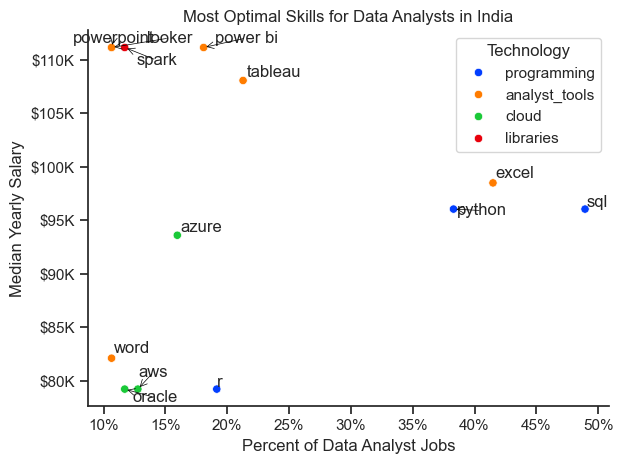

In [99]:
# Plotting the data
sns.scatterplot(
    data=df_plot,
    x='skill_percent',
    y='median_salary',
    hue='technology',
    palette = 'bright'
)

sns.despine()
sns.set_theme(style='ticks')

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(
    texts,
    arrowprops=dict(arrowstyle='->', color='black', lw=0.5),
    expand_text=(1.2, 1.2),
    expand_points=(1.2, 1.2),
    force_text=(0.8, 2.0),
    force_points=(0.8, 2.0)
)

# Set axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in India')
plt.legend(title='Technology')

from matplotlib.ticker import PercentFormatter
axe = plt.gca()
axe.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
axe.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout and display plot 
plt.tight_layout()
plt.show()